# Matrices

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Matrices

### Example 1: Linear equations

Consider a set of  $m$ linear equations in $n$ unknowns:

\begin{align*}
a_{11} x_1 + &a_{12} x_2& +& ... + &a_{1n} x_n &=& b_1\\
\vdots  && &&\vdots &= &\vdots\\
a_{m1} x_1 + &a_{m2} x_2& +& ... + &a_{mn} x_n &=&b_m 
\end{align*}

We can let

\begin{align*}
    A=\left[\begin{matrix}a_{11}&\cdots&a_{1n}\\
               \vdots & &\vdots\\
               a_{m1}&\cdots&a_{mn}\end{matrix}\right]
\end{align*}

\begin{align*}
x = \left[\begin{matrix}x_1\\
               \vdots\\
               x_n\end{matrix}\right] & \;\;\;\;\textrm{   and } &
b =  \left[\begin{matrix}b_1\\
               \vdots\\
               b_m\end{matrix}\right]
\end{align*}

and re-write the system:
    
$$ Ax = b$$


### Example 2: Covariance matrix

Suppose we have $n$ observations of $p$ variables in a $n \times p$ matrix. The covariance matrix is a matrix with special useful properties - it is symmetric and positive semi-definite.

The sample covariance matrix is given by the element-wise formula

![cov](https://wikimedia.org/api/rest_v1/media/math/render/svg/61c41f7dd5d200b419a9cd94d8cb92bd47dbe08e)

In [3]:
n, p = 10, 3
x = np.random.random((n, p))

In [4]:
x

array([[0.5811518 , 0.81170724, 0.46066868],
       [0.62916694, 0.56696383, 0.03571622],
       [0.15734164, 0.32934947, 0.04289507],
       [0.0742373 , 0.80973484, 0.15784067],
       [0.71996509, 0.78657021, 0.06061383],
       [0.80620927, 0.54386761, 0.52941123],
       [0.44361754, 0.83900412, 0.06595371],
       [0.09411615, 0.73196712, 0.46633059],
       [0.66841256, 0.9355156 , 0.00934562],
       [0.90776993, 0.06387907, 0.44189336]])

In [5]:
np.cov(x, rowvar=False)

array([[ 0.09177719, -0.0213747 ,  0.01174369],
       [-0.0213747 ,  0.07312517, -0.01689738],
       [ 0.01174369, -0.01689738,  0.04730807]])

In [6]:
v = x - x.mean(axis=0)
v.T @ v

array([[ 0.82599467, -0.1923723 ,  0.10569322],
       [-0.1923723 ,  0.65812653, -0.15207638],
       [ 0.10569322, -0.15207638,  0.42577266]])

### Example 3: Adjacency matrix for graph

You can represent a graph as an adjacency matrix. This is a $n \times n$ matrix $A$ for a graph with $n$ nodes, where a 1 at $A(i, j)$ indicates that there is an edge between node $i$ and node $j$. The adjacency matrix is typically a **sparse** graph, where most entires are 0 (no edges) and sparse matrix representations are useful for efficient calculations.

In [7]:
import networkx as nx

In [8]:
g = nx.random_lobster(50,0.7,0.7)

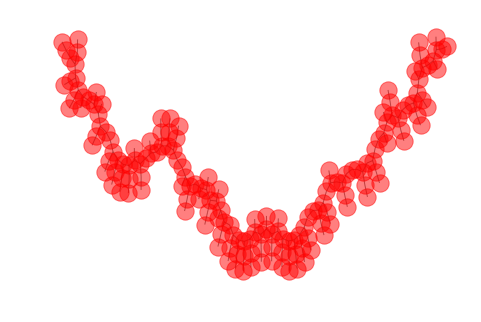

In [9]:
nx.draw_kamada_kawai(g, nodesize=200, alpha=0.5)

In [10]:
m = nx.adjacency_matrix(g)

In [11]:
m

<173x173 sparse matrix of type '<class 'numpy.int64'>'
	with 344 stored elements in Compressed Sparse Row format>

In [12]:
m.todense()

matrix([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

## Matrix representation in Python

We simply use nd-arrays with two dimensions to represent matrices.  There is a `np.matrix` class, but it is not often used because most numpy creation functions return `ndarray`s, and confusing behavior can result when mixed with `ndarray`s.

In [13]:
M1 = np.random.random((4,4))
M1

array([[0.06774977, 0.47570098, 0.7371909 , 0.84900474],
       [0.89349125, 0.48335136, 0.5983335 , 0.84058831],
       [0.34086422, 0.42671514, 0.86893581, 0.03561096],
       [0.75748027, 0.94098489, 0.3285091 , 0.8260875 ]])

In [14]:
M2 = np.matrix(M1)
M2

matrix([[0.06774977, 0.47570098, 0.7371909 , 0.84900474],
        [0.89349125, 0.48335136, 0.5983335 , 0.84058831],
        [0.34086422, 0.42671514, 0.86893581, 0.03561096],
        [0.75748027, 0.94098489, 0.3285091 , 0.8260875 ]])

**Matrix multiplication**

In [15]:
M1 @ M1

array([[1.32401103, 1.37563049, 1.2540497 , 1.18499284],
       [1.33308358, 1.70496206, 1.74393325, 1.88058454],
       [0.72752345, 0.77270024, 1.27334793, 0.70844852],
       [1.62980286, 1.73267609, 1.67826093, 2.12820432]])

In [16]:
M2 * M2

matrix([[1.32401103, 1.37563049, 1.2540497 , 1.18499284],
        [1.33308358, 1.70496206, 1.74393325, 1.88058454],
        [0.72752345, 0.77270024, 1.27334793, 0.70844852],
        [1.62980286, 1.73267609, 1.67826093, 2.12820432]])

**Transposition**

In [17]:
M1.T

array([[0.06774977, 0.89349125, 0.34086422, 0.75748027],
       [0.47570098, 0.48335136, 0.42671514, 0.94098489],
       [0.7371909 , 0.5983335 , 0.86893581, 0.3285091 ],
       [0.84900474, 0.84058831, 0.03561096, 0.8260875 ]])

In [18]:
M2.T

matrix([[0.06774977, 0.89349125, 0.34086422, 0.75748027],
        [0.47570098, 0.48335136, 0.42671514, 0.94098489],
        [0.7371909 , 0.5983335 , 0.86893581, 0.3285091 ],
        [0.84900474, 0.84058831, 0.03561096, 0.8260875 ]])

**Inverse**

In [19]:
np.linalg.inv(M1)

array([[-1.12872357,  1.27794536,  0.13284281, -0.14606798],
       [-0.05230806, -1.62586277,  0.52671501,  1.68545608],
       [ 0.43062073,  0.27370063,  0.88405168, -0.7591817 ],
       [ 0.9233212 ,  0.57134475, -1.07334356, -0.2735146 ]])

In [20]:
M2.I

matrix([[-1.12872357,  1.27794536,  0.13284281, -0.14606798],
        [-0.05230806, -1.62586277,  0.52671501,  1.68545608],
        [ 0.43062073,  0.27370063,  0.88405168, -0.7591817 ],
        [ 0.9233212 ,  0.57134475, -1.07334356, -0.2735146 ]])

## Properties of a matrix

In [21]:
M = np.arange(16).reshape((4,4))

In [22]:
M

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [23]:
M.size

16

In [24]:
M.shape

(4, 4)

#### Norms

Just as with vectors, we can measure the size or norm of a matrix. There are many possible norms. 

The following norms can be calculated using `np.linalg.norm`
    
    =====  ============================  ==========================
    ord    norm for matrices             norm for vectors
    =====  ============================  ==========================
    None   Frobenius norm                2-norm
    'fro'  Frobenius norm                --
    'nuc'  nuclear norm                  --
    inf    max(sum(abs(x), axis=1))      max(abs(x))
    -inf   min(sum(abs(x), axis=1))      min(abs(x))
    0      --                            sum(x != 0)
    1      max(sum(abs(x), axis=0))      as below
    -1     min(sum(abs(x), axis=0))      as below
    2      2-norm (largest sing. value)  as below
    -2     smallest singular value       as below
    other  --                            sum(abs(x)**ord)**(1./ord)
    =====  ============================  ==========================

In [25]:
np.linalg.norm(M)

35.21363372331802

In [26]:
np.sqrt(np.sum(M**2))

35.21363372331802

In [27]:
np.linalg.norm(M, ord=2)

35.13996365902469

In [28]:
np.linalg.svd(M)[1][0]

35.13996365902469

#### Trace

The trace of a matrix $A$ is the sum of its diagonal elements.  It is important for a couple of reasons:

* It is an *invariant* of a matrix under change of basis
* It defines a matrix norm

In [29]:
M.trace()

30

In [30]:
M.diagonal().sum()

30

#### Determinant

The determinant of a matrix is defined to be the alternating sum of permutations of the elements of a matrix.  Let's not dwell on that though. It is important to know that the determinant of a $2\times 2$ matrix is

$$\left|\begin{matrix}a_{11} & a_{12}\\a_{21} & a_{22}\end{matrix}\right| = a_{11}a_{22} - a_{12}a_{21}$$

This may be extended to an $n \times n$ matrix by minor expansion.  I will leave that for you to google. 

What is most important about the determinant:

* Like the trace, it is also invariant under change of basis
* An $n\times n$ matrix $A$ is invertible $\iff$ det$(A)\neq 0$ 
* The rows(columns) of an $n\times n$ matrix $A$ are linearly independent $\iff$ det$(A)\neq 0$

Geometrically, the determinant is the volume of the paralleliped spanned by the column vectors of the matrix.

In [31]:
np.linalg.det(M)

0.0

### Matrix operations

In [32]:
A = np.arange(12).reshape((3,4))
B = np.arange(12).reshape((4,3))

#### Addition

In [33]:
A + A

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

#### Scalar multiplication

In [34]:
2 * A

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14],
       [16, 18, 20, 22]])

#### Matrix multiplication

In [35]:
A @ B

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])

In [36]:
A.T @ A

array([[ 80,  92, 104, 116],
       [ 92, 107, 122, 137],
       [104, 122, 140, 158],
       [116, 137, 158, 179]])

In [37]:
A @ A.T

array([[ 14,  38,  62],
       [ 38, 126, 214],
       [ 62, 214, 366]])

First, let's review some linear algebra topics:

### Linear Independence

A collection of vectors $v_1,...,v_n$ is said to be *linearly independent* if

$$c_1v_1 + \cdots c_nv_n = 0$$
$$\iff$$
$$c_1=\cdots=c_n=0$$

In other words, any linear combination of the vectors that results in a zero vector is trivial.

Another interpretation of this is that no vector in the set may be expressed as a linear combination of the others.  In this sense, linear independence is an expression of non-redundancy in a set of vectors.


Fact: Any linearly independent set of $n$ vectors spans an $n$-dimensional space. (I.e. the collection of all possible linear combinations is $\mathbb{R}^n$.)  Such a set of vectors is said to be a *basis* of $\mathbb{R}^n$.  Another term for basis is *minimal spanning set*.

### Column space, Row space, Rank and Kernel

Let $A$ be an $m\times n$ matrix.  We can view the columns of $A$ as vectors, say $a_1,...,a_n$. The space of all linear combinations of the $a_i$ are the *column space* of the matrix $A$.  Now, if $a_1,...,a_n$ are *linearly independent*, then the column space is of dimension $n$.  Otherwise, the dimension of the column space is the size of the maximal set of linearly independent $a_i$.  Row space is exactly analogous, but the vectors are the *rows* of $A$.

The *rank* of a matrix *A* is the dimension of its column space - and - the dimension of its row space.  These are equal for any matrix.  Rank can be thought of as a measure of non-degeneracy of a system of linear equations, in that it is the *dimension of the image of the linear transformation* determined by $A$. 

The *kernel* of a matrix *A* is the dimension of the space mapped to zero under the linear transformation that $A$ represents. The dimension of the kernel of a linear transformation is called the *nullity*. 

Index theorem: For an $m\times n$ matrix $A$, 

rank($A$) + nullity($A$) = $n$.

## Solving linear equations (Matrix-vector multiplication)

We return to solving the system of equations

$$
Ax = b
$$

Expanding,

\begin{align*}
    \left[\begin{matrix}a_{11}&\cdots&a_{1n}\\
               \vdots & &\vdots\\
               a_{m1}&\cdots&a_{mn}\end{matrix}\right]
\left[\begin{matrix}x_1\\
               \vdots\\
               x_n\end{matrix}\right] =
\left[\begin{matrix}b_1\\
               \vdots\\
               b_m\end{matrix}\right]
\end{align*}

which can be rewritten as a weighted sum of the column vectors of $A$

$$
x_1 \left[ \matrix{a_{11} \\ \vdots \\ a_{m1}} \right] + \cdots + x_n \left[ \matrix{a_{1n} \\ \vdots \\ a_{mn}} \right]
= \left[\begin{matrix}b_1\\
               \vdots\\
               b_m\end{matrix}\right]
$$

So solving the system of equations means finding the appropriate weights $x$ such that the sum of weighted column vectors of $A$ is the same as $b$. Put another way, we are trying to express $b$ as a linear combination of the column vectors of $A$.

Note that we have two different useful perspectives on a matrix - as a collection of column (or row) vectors that span a vector space, and as a function that transforms or maps a vector into another vector. 

#### Solving for m = n

In [38]:
A = np.random.random((3,3))
b = np.random.random((3,1))

In [39]:
A

array([[0.9955822 , 0.01409361, 0.3081781 ],
       [0.02769147, 0.25728312, 0.36249502],
       [0.819182  , 0.67269385, 0.38365708]])

In [40]:
b

array([[0.48881805],
       [0.94095385],
       [0.02464686]])

Using the solve function.

In [41]:
np.linalg.solve(A, b)

array([[-0.5869833 ],
       [-1.26775132],
       [ 3.54040529]])

Using the projection onto the column space of A.

In [42]:
np.linalg.inv(A.T @ A) @ A.T @ b

array([[-0.5869833 ],
       [-1.26775132],
       [ 3.54040529]])

#### Underdetermined System ($m<n$)

When $m<n$, the linear system is said to be *underdetermined*.  I.e. there are fewer equations than unknowns.  In this case, there are either no solutions (if the system is *inconsistent*) or infinite solutions.  A unique solution is not possible.

#### Overdetermined System

When $m>n$, the system may be *overdetermined*.  In other words, there are more equations than unknowns.  They system could be inconsistent, or some of the equations could be redundant.

There are many techniques to solve and analyze linear systems.  Our goal is to understand the theory behind many of the built-in functions, and how they *efficiently* solve systems of equations.

### Special Matrices

Some matrices have interesting properties that allow us either simplify the underlying linear system or to understand more about it. 

#### Square Matrices

Square matrices have the same number of columns (usually denoted $n$).  We refer to an arbitrary square matrix as and $n\times n$ or we refer to it as a 'square matrix of dimension $n$'.  If an $n\times n$ matrix $A$ has *full rank* (i.e. it has rank $n$), then $A$ is invertible, and its inverse is unique.  This is a situation that leads to a unique solution to a linear system.

#### Diagonal Matrices

A diagonal matrix is a matrix with all entries off the diagonal equal to zero.  Strictly speaking, such a matrix should be square, but we can also consider rectangular matrices of size $m\times n$ to be diagonal, if all entries $a_{ij}$ are zero for $i\neq j$

#### Symmetric and Skew Symmetric

A matrix $A$ is (skew) symmetric iff $a_{ij} = (-)a_{ji}$.

Equivalently, $A$ is (skew) symmetric iff

$$A = (-)A^T$$

#### Upper and Lower Triangular

A matrix $A$ is (upper|lower) triangular if $a_{ij} = 0$ for all $i (>|<) j$

#### Orthogonal and Orthonormal

A matrix $A$ is *orthogonal* iff

$$A A^T = I$$

In other words, $A$ is orthogonal iff 

$$A^T=A^{-1}$$

Fact: The rows and columns of an orthogonal matrix are an orthonormal set of vectors.


#### Positive Definite

Positive definite matrices are an important class of matrices with very desirable properties. A square matrix $A$ is positive definite if

$$u^TA u > 0$$

for any non-zero n-dimensional vector $u$.

A symmetric, positive-definite matrix $A$ is a positive-definite matrix such that

$$A = A^T$$

IMPORTANT: 

* Symmetric, positive-definite matrices have 'square-roots' (in a sense)
* Any symmetric, positive-definite matrix is *diagonizable*!!!
* Co-variance matrices are symmetric and positive-definite


Now that we have the basics down, we can move on to numerical methods for solving systems - aka matrix decompositions.